X: [[ 0.3024719 ]
 [-1.270485  ]
 [ 1.53277921]
 [-1.60205766]
 [ 1.13940068]
 [-0.50965218]
 [ 0.40746184]
 [ 0.76103773]
 [ 0.44386323]
 [ 0.37816252]]
y: [  15.09045952 -137.95839531  140.51590289 -142.2350452   106.7817454
  -29.81182785   46.86292398   78.42686462   38.87195693   28.73769174]


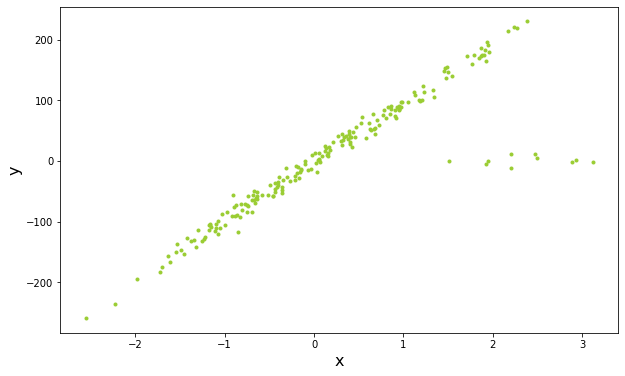

In [ ]:
import numpy as np
from sklearn import linear_model, datasets
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (10, 6)
rcParams['legend.fontsize'] = 16
rcParams['axes.labelsize'] = 16

n_samples = 200
n_outliers = 10
inlier_noise = 10

# Generate inliers
X, y, coef = datasets.make_regression(n_samples=n_samples, n_features=1,
                                      n_informative=1, noise=inlier_noise,
                                      coef=True, random_state=0)

print('X: {}'.format(X[0:10,]))
print('y: {}'.format(y[0:10,]))

# Add outliers
np.random.seed(0)
X[:n_outliers] = 2 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

# Plot the data
plt.scatter(X, y, color='yellowgreen', marker='.',label='Inliers')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

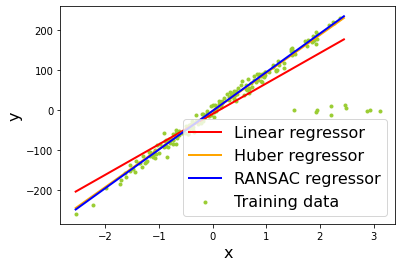

In [ ]:
# Fit a linear regression model
lr = linear_model.LinearRegression()
lr.fit(X, y)

# Fit a Huber regression model
hu = linear_model.HuberRegressor()
hu.fit(X, y)

# Fit a RANSAC regression model
ra = linear_model.RANSACRegressor()
ra.fit(X, y)

# Predict data of estimated models
line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y = lr.predict(line_X)
line_y_huber = hu.predict(line_X)
line_y_ransac = ra.predict(line_X)

lw = 2
plt.scatter(X, y, color='yellowgreen', marker='.',label='Training data')
plt.plot(line_X, line_y, color='red', linewidth=lw, label='Linear regressor')
plt.plot(line_X, line_y_huber, color='orange', linewidth=lw, label='Huber regressor')
plt.plot(line_X, line_y_ransac, color='blue', linewidth=lw, label='RANSAC regressor')
plt.legend(loc='lower right')
plt.xlabel("x")
plt.ylabel("y")
plt.show()